<a href="https://colab.research.google.com/github/JeffersonRodrigues9/Projetos-em-Machine-Learning/blob/main/Projeto03_ML_Parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Projeto de Classificação de Reservas de Hotéis
# O objetivo deste projeto é prever se um cliente vai manter ou cancelar sua reserva de hotel.
# Utilizaremos técnicas de machine learning para fazer essa previsão com base nas features do nosso conjunto de dados.
# Contexto: Vou analisar as colunas (features) do dataset para identificar quais são as mais importantes
# para a previsão. Meu foco será na seleção das melhores colunas, eliminando redundâncias
# e mantendo aquelas que realmente contribuem para a classificação.
# Apliquei métodos de análise de dados, pré-processamento e avaliação de modelos para
# garantir a melhor performance possível do modelo de classificação.


In [2]:
url = 'https://raw.githubusercontent.com/allanspadini/dados-com-muitas-dimensoes/main/dados/hotel.csv'

In [3]:
import pandas as pd

df = pd.read_csv(url)

In [4]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,2,0,1,2,0,305,2018,11,4,0,...,0,0,0,0,0,0,0,1,0,1
34142,2,0,0,3,0,67,2018,9,28,0,...,0,0,0,0,0,0,0,0,1,1
34143,1,0,0,2,0,193,2018,6,20,0,...,0,0,0,0,0,0,0,0,1,1
34144,2,0,2,1,0,85,2017,7,5,0,...,0,0,0,0,0,0,0,0,1,1


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

In [7]:
X = df.drop(['booking_status'],axis=1)

In [8]:
y = df['booking_status']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_treino,X_teste, y_treino, y_teste = train_test_split(X,y, random_state=50, test_size=0.3,stratify=y)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
modelo = RandomForestClassifier(random_state=2)

In [13]:
modelo.fit(X_treino,y_treino)

RandomForestClassifier(random_state=2)

In [14]:
modelo.score(X_teste,y_teste)

0.920636470128856

In [15]:
df['booking_status'].value_counts()

,count
booking_status,
0,17073
1,17073


In [16]:
# Passo 1: Análise do Dataset
# O primeiro passo foi carregar e analisar o dataset. Verificamos se existiam dados nulos e analisamos as colunas para entender as informações disponíveis.
# A coluna 'booking_status' foi identificada como a variável alvo, que indica se a reserva foi mantida ou cancelada.
# O dataset foi dividido em duas partes:
# - X: as features (informações dos clientes e reservas), que são as colunas de entrada para o modelo de machine learning.
# - y: a variável alvo ('booking_status'), que indica se a reserva foi mantida ou cancelada.
# Divisão dos Dados em Treinamento e Teste
# Dividimos os dados em dados de treinamento (70%) e dados de teste (30%) utilizando a função train_test_split.
# O parâmetro 'stratify=y' foi usado para garantir que a distribuição das classes (cancelamento ou não) seja mantida tanto no treino quanto no teste.
# Aplicação do Modelo de Machine Learning
# Utilizamos o modelo Random Forest Classifier para classificar as reservas.
# O modelo foi ajustado (treinado) com os dados de treino.
# Avaliação do Modelo
# A performance do modelo foi avaliada usando a acurácia, que foi de 92% no conjunto de dados de teste.
# Isso indica que o modelo consegue prever corretamente se o cliente manterá ou cancelará a reserva em 92% dos casos.
# Até agora, o modelo foi ajustado e avaliado sem ajustes finos ou seleção de features. O foco foi em verificar a performance inicial do modelo.

In [17]:
import seaborn as sns

<Axes: xlabel='booking_status', ylabel='arrival_month'>

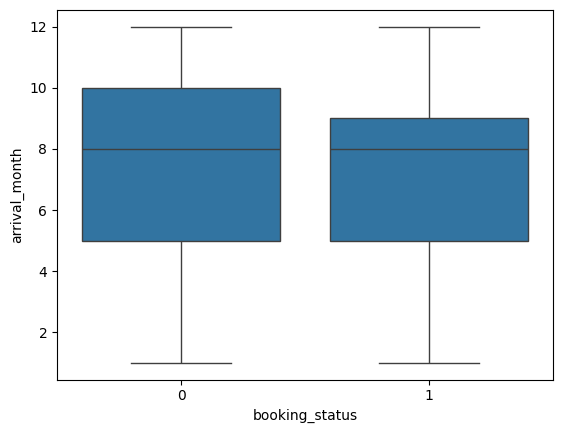

In [18]:
sns.boxplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='arrival_month'>

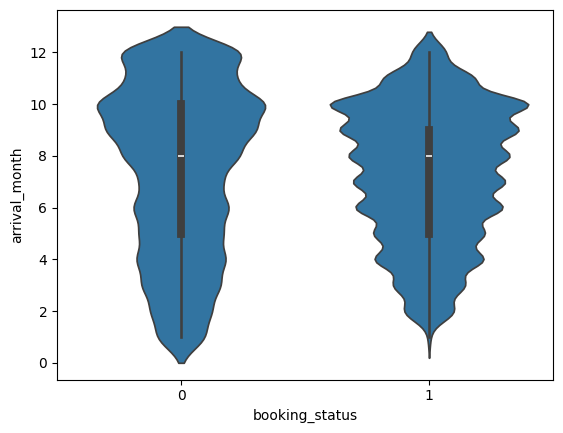

In [19]:
sns.violinplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='lead_time'>

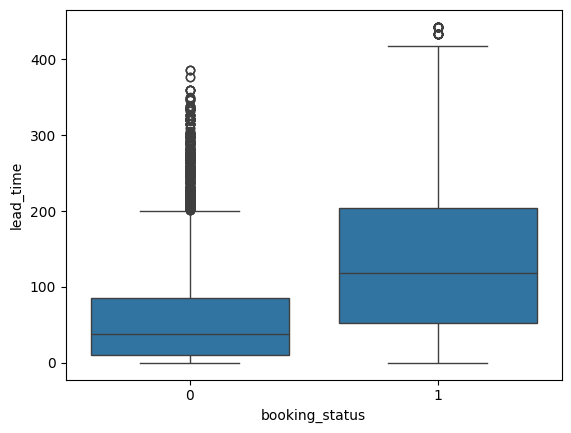

In [20]:
sns.boxplot(X_treino, x=y_treino, y='lead_time')

In [21]:
correlacao = pd.concat([X_treino,y_treino],axis=1).corr()

<Axes: >

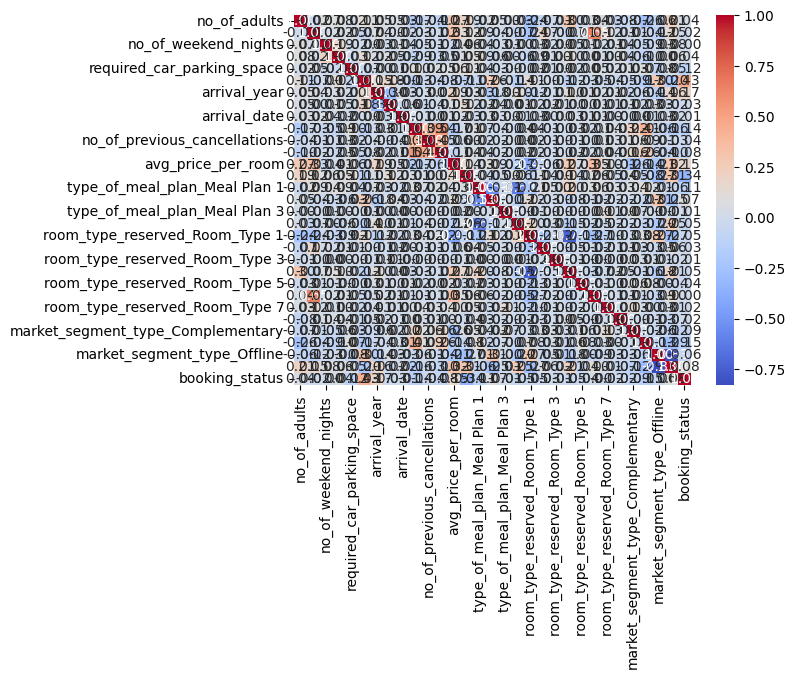

In [22]:
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')

In [23]:
import matplotlib.pyplot as plt

<Axes: >

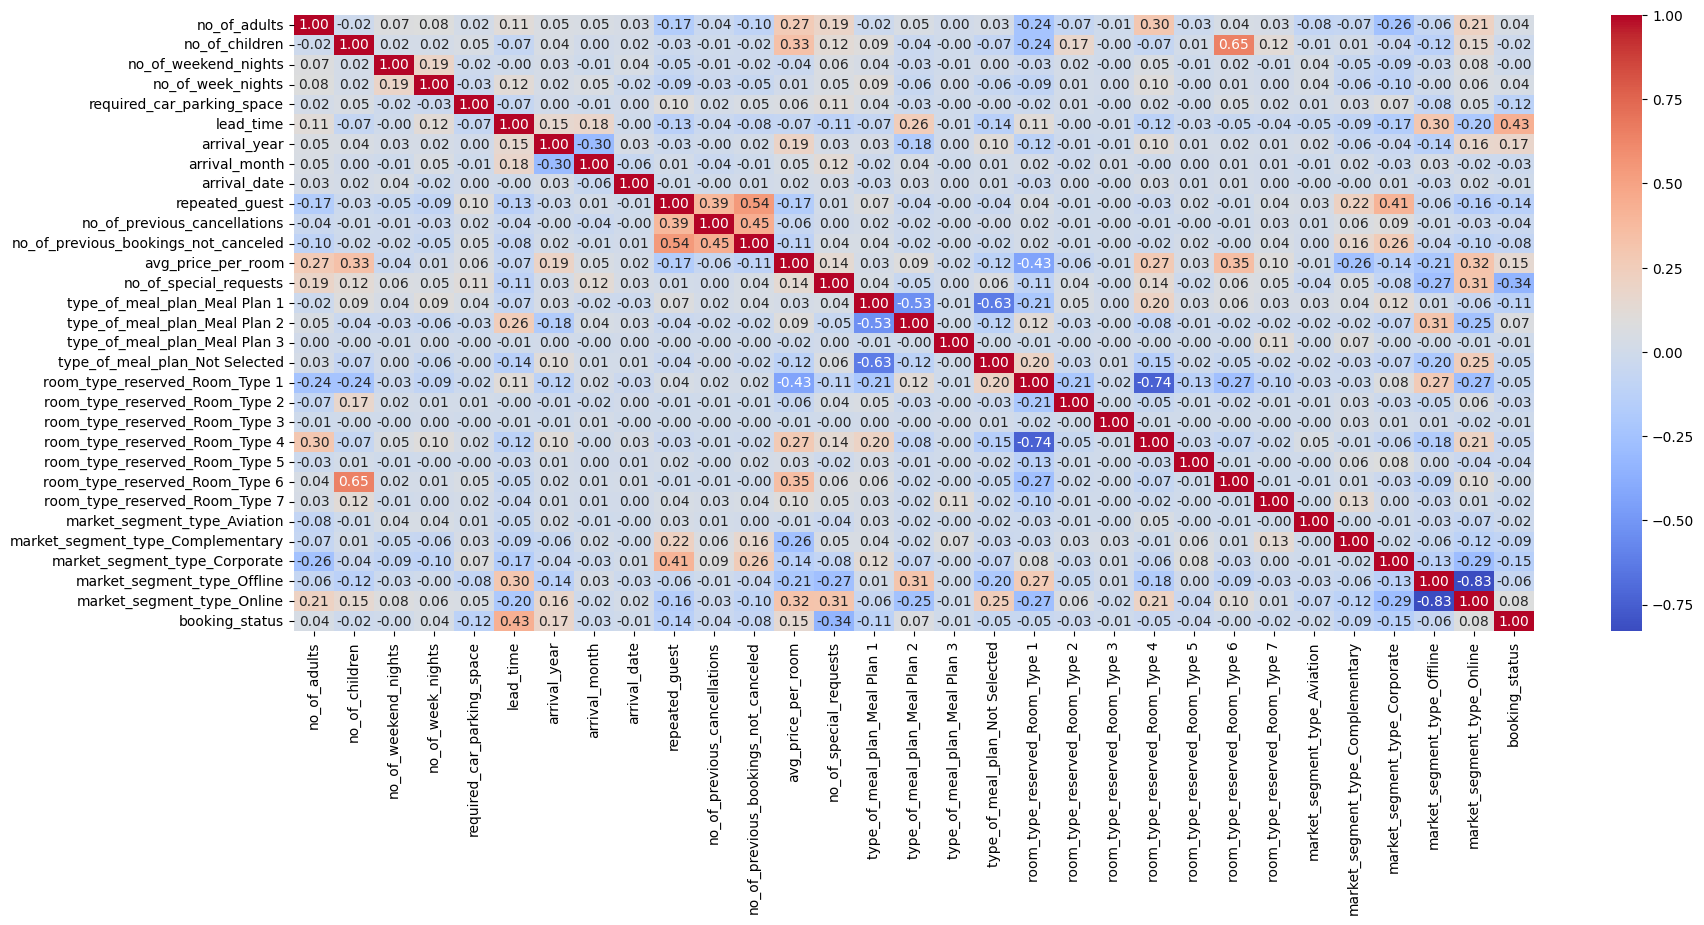

In [24]:
plt.figure(figsize = (20,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')

In [26]:
modelo = RandomForestClassifier(random_state=2)

In [27]:
modelo.fit(X_treino,y_treino)

RandomForestClassifier(random_state=2)

In [28]:
modelo.feature_importances_

array([2.24533588e-02, 5.74179351e-03, 3.17549138e-02, 4.73535010e-02,
       8.56661469e-03, 2.83828346e-01, 2.36090084e-02, 8.55979884e-02,
       8.23939284e-02, 4.19694499e-03, 4.64355673e-04, 2.68056078e-03,
       1.37017865e-01, 1.37129856e-01, 1.50643354e-02, 9.81369588e-03,
       9.40519723e-06, 1.00358358e-02, 9.71973107e-03, 2.63968029e-03,
       5.78834536e-05, 7.79609257e-03, 2.21700197e-03, 1.50837806e-03,
       4.10442195e-04, 8.23193388e-04, 2.07244064e-03, 1.23178537e-02,
       2.97493187e-02, 2.29756754e-02])

In [30]:
importancia = pd.DataFrame({'colunas': X_treino.columns, 'importancia':modelo.feature_importances_})

In [31]:
importancia

,colunas,importancia
0,no_of_adults,0.022453
1,no_of_children,0.005742
2,no_of_weekend_nights,0.031755
3,no_of_week_nights,0.047354
4,required_car_parking_space,0.008567
5,lead_time,0.283828
6,arrival_year,0.023609
7,arrival_month,0.085598
8,arrival_date,0.082394
9,repeated_guest,0.004197


In [35]:
importancia10 = importancia.sort_values(by='importancia',ascending=False).head(10)

<ipython-input-37-56bbd767fee3>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)


[Text(0, 0, 'lead_time'),
 Text(1, 0, 'no_of_special_requests'),
 Text(2, 0, 'avg_price_per_room'),
 Text(3, 0, 'arrival_month'),
 Text(4, 0, 'arrival_date'),
 Text(5, 0, 'no_of_week_nights'),
 Text(6, 0, 'no_of_weekend_nights'),
 Text(7, 0, 'market_segment_type_Offline'),
 Text(8, 0, 'arrival_year'),
 Text(9, 0, 'market_segment_type_Online')]

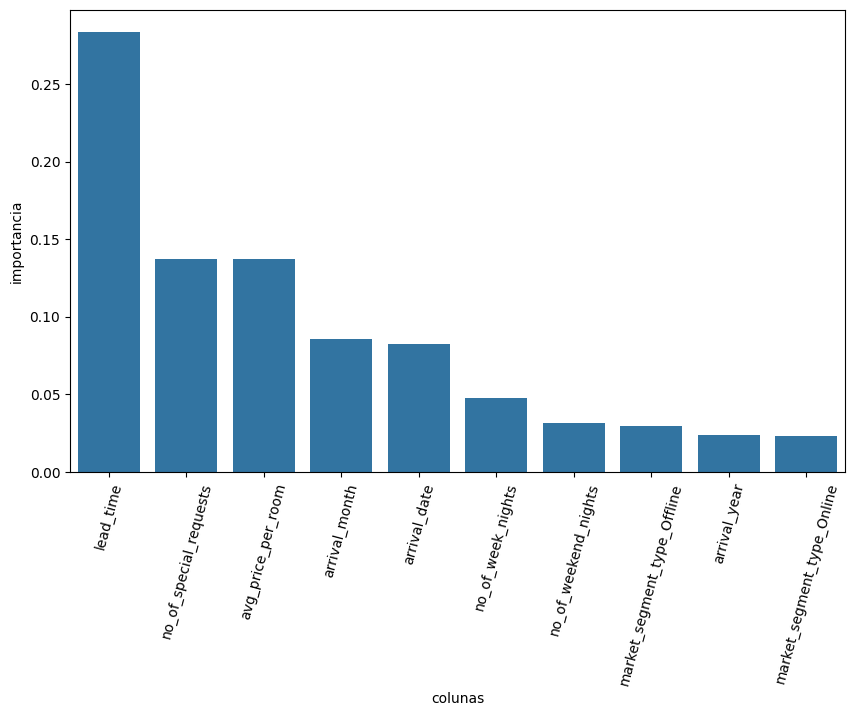

In [37]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='colunas',y='importancia',data=importancia10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [38]:
# Etapa 2 - Ajuste e Análise de Importância das Features

# Eu ajustei o modelo de Machine Learning utilizando o RandomForestClassifier
# com os dados de treino (X_treino e y_treino).

# Após treinar o modelo, eu acessei as importâncias das features,
# que indicam quais variáveis mais contribuem para a previsão.

# Eu organizei as importâncias das features em um DataFrame e as ordenei
# em ordem decrescente para identificar as mais relevantes.

# Então, selecionei as 10 features mais importantes e visualizei os resultados
# em um gráfico de barras, com rotação nas labels do eixo X para facilitar a leitura.

In [39]:
from sklearn.feature_selection import SelectFromModel

In [40]:
modelo_fselecionadas = SelectFromModel(modelo, max_features=10, prefit=True)

In [42]:
X_treino_selecionado = modelo_fselecionadas.transform(X_treino);
X_teste_selecionado = modelo_fselecionadas.transform(X_teste);

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [43]:
modelo = RandomForestClassifier(random_state=2)

In [44]:
modelo.fit(X_treino_selecionado,y_treino)

RandomForestClassifier(random_state=2)

In [45]:
modelo.score(X_teste_selecionado,y_teste)

0.8976962124170246

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
modelo = RandomForestClassifier(random_state=2)

In [48]:
parametros_busca = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [49]:
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros_busca,
                           scoring='accuracy', cv=5, n_jobs=-1)

In [52]:
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [53]:
grid_search.cv_results_

{'mean_fit_time': array([ 3.99440155,  7.57792497, 11.90346661,  3.83793817,  7.22330608,
        10.617168  ,  3.31202745,  6.97245088, 10.07497735,  3.19858537,
         7.40256085, 10.01115651,  2.3425179 ,  4.60893164,  6.59543986,
         2.4653091 ,  4.34650674,  6.82853494,  2.00832005,  4.54207425,
         7.35996938,  2.26674738,  4.57702065,  6.52292089,  3.71938953,
         6.68007078, 10.31202722,  3.52497163,  6.62526212, 10.59252405,
         3.44672308,  6.2330339 ,  9.64950633,  2.85678029,  6.47835374,
         8.9837729 ]),
 'std_fit_time': array([0.51498966, 0.73866981, 0.70195393, 1.17218472, 0.70051356,
        0.56674374, 0.58924928, 0.72262752, 0.43047443, 0.43439154,
        0.34474151, 0.46834995, 0.43454211, 0.75690101, 0.5769082 ,
        0.40867269, 0.54539809, 0.60789191, 0.03004762, 0.58294408,
        0.78301938, 0.38926174, 0.56180084, 0.81064633, 0.53880906,
        0.70678124, 0.66882467, 0.53133056, 0.71354423, 0.5992565 ,
        0.52903229, 0.793

In [54]:
modelo_fselecionadas = SelectFromModel(grid_search.best_estimator_, max_features=10,prefit=True)

In [55]:
X_treino_selecionado = modelo_fselecionadas.transform(X_treino)
X_teste_selecionado = modelo_fselecionadas.transform(X_teste)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [56]:
modelo = grid_search.best_estimator_

In [57]:
modelo.fit(X_treino_selecionado,y_treino)

RandomForestClassifier(n_estimators=300, random_state=2)

In [58]:
modelo.score(X_teste_selecionado,y_teste)

0.8973057399453338

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
y_pred = modelo.predict(X_teste_selecionado)

In [61]:
matriz_confusao = confusion_matrix(y_teste,y_pred)

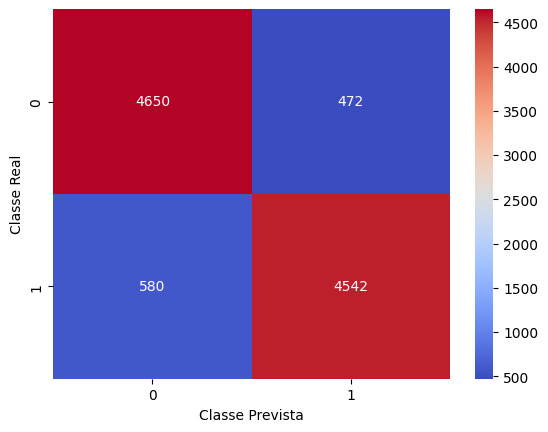

In [63]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm',fmt='d')
plt.xlabel('Classe Prevista');
plt.ylabel('Classe Real');

In [64]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [65]:
fpr, tpr, thresholds = roc_curve(y_teste,y_pred)

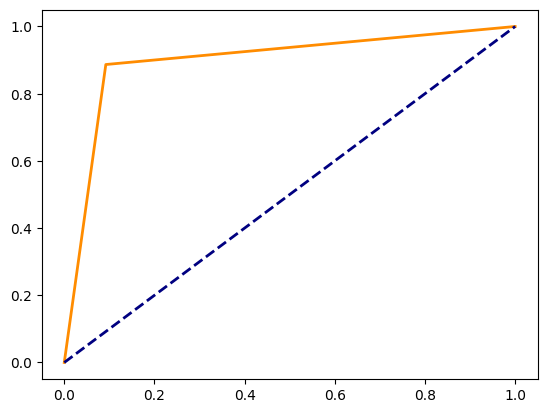

In [67]:
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

In [68]:
roc_auc = auc(fpr, tpr)

In [69]:
roc_auc

np.float64(0.8973057399453339)

In [70]:
# Nessa terceira etapa do projeto, melhorei o modelo utilizando validação cruzada e otimização de parâmetros com o GridSearchCV.

# Ao invés de usar apenas uma divisão entre treino e teste, apliquei a validação cruzada para garantir que o modelo tenha
# um desempenho consistente. Para isso, importei o GridSearchCV e o RandomForestClassifier, e criei um dicionário com
# os parâmetros do modelo para encontrar a melhor combinação.

# O GridSearchCV fez uma busca exaustiva, testando várias combinações de parâmetros e realizando validação cruzada
# com 5 folds. Com o melhor modelo encontrado, usei o SelectFromModel para selecionar as 10 melhores features.

# Depois, treinei o modelo novamente com essas features selecionadas e verifiquei seu desempenho nos dados de teste.

# O objetivo foi otimizar o modelo, garantindo maior consistência e precisão nas previsões.